#***RNN***

#8:2

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/Bnb.csv')

In [2]:
# Chỉ lấy cột giá đóng cửa
prices = data['Close'].values.reshape(-1, 1)

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Phân chia dữ liệu theo tỉ lệ 8:2
train_size = int(len(scaled_prices) * 0.8)
test_size = int(len(scaled_prices) * 0.2)

train, test= scaled_prices[0:train_size], scaled_prices[train_size:train_size+test_size]

# Hàm tạo các tập dữ liệu theo định dạng thích hợp cho mô hình RNN
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 60
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Định dạng lại dữ liệu đầu vào cho mô hình RNN [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Xây dựng mô hình RNN
model = Sequential()
model.add(SimpleRNN(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
1475/1475 - 15s - loss: 0.0018 - 15s/epoch - 10ms/step
Epoch 2/50
1475/1475 - 23s - loss: 7.6619e-04 - 23s/epoch - 16ms/step
Epoch 3/50
1475/1475 - 16s - loss: 6.5298e-04 - 16s/epoch - 11ms/step
Epoch 4/50
1475/1475 - 12s - loss: 6.8611e-04 - 12s/epoch - 8ms/step
Epoch 5/50
1475/1475 - 11s - loss: 6.4954e-04 - 11s/epoch - 7ms/step
Epoch 6/50
1475/1475 - 11s - loss: 6.4195e-04 - 11s/epoch - 7ms/step
Epoch 7/50
1475/1475 - 11s - loss: 6.4501e-04 - 11s/epoch - 7ms/step
Epoch 8/50
1475/1475 - 10s - loss: 6.1934e-04 - 10s/epoch - 7ms/step
Epoch 9/50
1475/1475 - 11s - loss: 7.1806e-04 - 11s/epoch - 8ms/step
Epoch 10/50
1475/1475 - 12s - loss: 6.3994e-04 - 12s/epoch - 8ms/step
Epoch 11/50
1475/1475 - 11s - loss: 6.3769e-04 - 11s/epoch - 8ms/step
Epoch 12/50
1475/1475 - 11s - loss: 6.5283e-04 - 11s/epoch - 8ms/step
Epoch 13/50
1475/1475 - 10s - loss: 0.0011 - 10s/epoch - 7ms/step
Epoch 14/50
1475/1475 - 11s - loss: 5.6349e-04 - 11s/epoch - 8ms/step
Epoch 15/50
1475/1475 - 11s - loss

In [3]:
# Đánh giá mô hình
test_predict = model.predict(X_test)
test_predict = scaler.inverse_transform(test_predict)
y_test_actual = scaler.inverse_transform([y_test])

mse = mean_squared_error(y_test_actual[0], test_predict[:,0])
mae = mean_absolute_error(y_test_actual[0], test_predict[:,0])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test_actual[0] - test_predict[:,0]) / y_test_actual[0])) * 100

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

11/11 [==============================] - 1s 7ms/step
MAE: 7.117032360803865
RMSE: 12.33716470083454
MAPE: 1.8513837273325753


1/1 [==============================] - 0s 21ms/step
30-day predictions: [593.64124 588.68225 581.8572  576.061   569.6071  564.9319  559.8496
 554.97345 550.77454 546.3773  542.0783  538.38513 534.5936  531.0671
 528.02594 524.9258  522.04315 519.48755 516.85486 514.40814 512.1942
 509.92612 507.8294  505.9049  503.95108 502.15134 500.47433 498.78226
 497.22318 495.75223]
60-day predictions: [593.64124 588.68225 581.8572  576.061   569.6071  564.9319  559.8496
 554.97345 550.77454 546.3773  542.0783  538.38513 534.5936  531.0671
 528.02594 524.9258  522.04315 519.48755 516.85486 514.40814 512.1942
 509.92612 507.8294  505.9049  503.95108 502.15134 500.47433 498.78226
 497.22318 495.75223 494.27786 492.91513 491.61624 490.3247  489.12738
 487.97852 486.84314 485.7859  484.76587 483.7637  482.82602 481.91803
 481.03116 480.19766 479.3874  478.59976 477.85507 477.13095 476.42773
 475.7592  475.1096  474.4815  473.8827  473.2997  472.73697 472.19855
 471.67435 471.16937 470.6849  470.21326

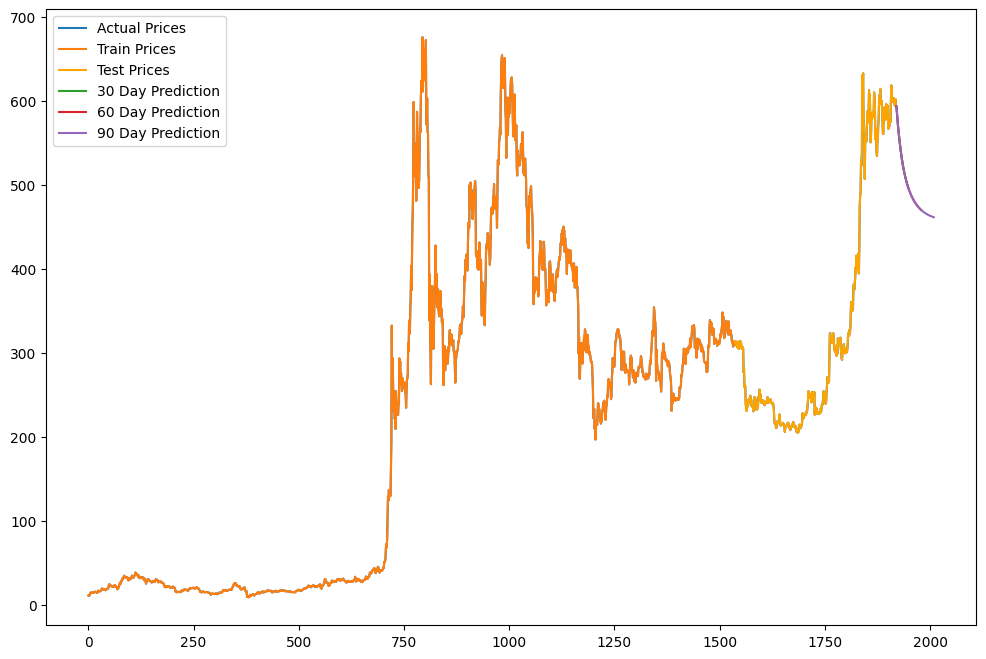

In [4]:
# Predict future values
def predict_future(model, data, days, look_back):
    predictions = []
    current_step = data[-look_back:]
    for _ in range(days):
        prediction = model.predict(current_step.reshape(1, look_back, 1))
        predictions.append(prediction[0, 0])
        current_step = np.append(current_step[1:], prediction[0, 0])
    return scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Predict 30, 60, and 90 days
pred_30 = predict_future(model, scaled_prices, 30, look_back)
pred_60 = predict_future(model, scaled_prices, 60, look_back)
pred_90 = predict_future(model, scaled_prices, 90, look_back)

# Print daily predictions
print("30-day predictions:", pred_30.flatten())
print("60-day predictions:", pred_60.flatten())
print("90-day predictions:", pred_90.flatten())

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(scaler.inverse_transform(scaled_prices), label='Actual Prices')
plt.plot(range(len(train)), scaler.inverse_transform(train), label='Train Prices')
plt.plot(range(len(train), len(train) + len(test)), scaler.inverse_transform(test), label='Test Prices', color='orange')
plt.plot(np.arange(len(scaled_prices), len(scaled_prices) + 30), pred_30, label='30 Day Prediction')
plt.plot(np.arange(len(scaled_prices), len(scaled_prices) + 60), pred_60, label='60 Day Prediction')
plt.plot(np.arange(len(scaled_prices), len(scaled_prices) + 90), pred_90, label='90 Day Prediction')
plt.legend()
plt.show()

#7:3

In [5]:
# Chỉ lấy cột giá đóng cửa
prices = data['Close'].values.reshape(-1, 1)

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Phân chia dữ liệu theo tỉ lệ 7:3
train_size = int(len(scaled_prices) * 0.7)
test_size = int(len(scaled_prices) * 0.3)

train, test = scaled_prices[0:train_size], scaled_prices[train_size:train_size+test_size]

# Hàm tạo các tập dữ liệu theo định dạng thích hợp cho mô hình RNN
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 60
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Định dạng lại dữ liệu đầu vào cho mô hình RNN [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Xây dựng mô hình RNN
model = Sequential()
model.add(SimpleRNN(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
1283/1283 - 15s - loss: 0.0039 - 15s/epoch - 12ms/step
Epoch 2/50
1283/1283 - 9s - loss: 0.0010 - 9s/epoch - 7ms/step
Epoch 3/50
1283/1283 - 9s - loss: 8.4946e-04 - 9s/epoch - 7ms/step
Epoch 4/50
1283/1283 - 10s - loss: 7.4211e-04 - 10s/epoch - 8ms/step
Epoch 5/50
1283/1283 - 10s - loss: 6.6169e-04 - 10s/epoch - 8ms/step
Epoch 6/50
1283/1283 - 9s - loss: 7.1529e-04 - 9s/epoch - 7ms/step
Epoch 7/50
1283/1283 - 11s - loss: 6.7671e-04 - 11s/epoch - 9ms/step
Epoch 8/50
1283/1283 - 10s - loss: 6.7165e-04 - 10s/epoch - 8ms/step
Epoch 9/50
1283/1283 - 9s - loss: 6.4543e-04 - 9s/epoch - 7ms/step
Epoch 10/50
1283/1283 - 9s - loss: 9.0578e-04 - 9s/epoch - 7ms/step
Epoch 11/50
1283/1283 - 10s - loss: 6.0477e-04 - 10s/epoch - 8ms/step
Epoch 12/50
1283/1283 - 11s - loss: 6.4241e-04 - 11s/epoch - 9ms/step
Epoch 13/50
1283/1283 - 9s - loss: 6.4224e-04 - 9s/epoch - 7ms/step
Epoch 14/50
1283/1283 - 10s - loss: 6.4724e-04 - 10s/epoch - 8ms/step
Epoch 15/50
1283/1283 - 10s - loss: 6.2674e-04 -

In [6]:
# Đánh giá mô hình
test_predict = model.predict(X_test)
test_predict = scaler.inverse_transform(test_predict)
y_test_actual = scaler.inverse_transform([y_test])

mse = mean_squared_error(y_test_actual[0], test_predict[:,0])
mae = mean_absolute_error(y_test_actual[0], test_predict[:,0])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test_actual[0] - test_predict[:,0]) / y_test_actual[0])) * 100

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

17/17 [==============================] - 0s 4ms/step
MAE: 10.320481797412773
RMSE: 14.902874435338902
MAPE: 2.905151327043866


1/1 [==============================] - 0s 21ms/step
30-day predictions: [577.7009  559.4552  537.7385  517.2488  497.31805 480.26697 463.7157
 448.9864  434.90735 421.5441  408.85458 397.0622  385.95337 375.36502
 365.09955 355.2206  345.7739  336.79163 328.1495  319.7293  311.50217
 303.53607 295.87573 288.474   281.23972 274.12915 267.17288 260.4206
 253.86877 247.46132]
60-day predictions: [577.7009   559.4552   537.7385   517.2488   497.31805  480.26697
 463.7157   448.9864   434.90735  421.5441   408.85458  397.0622
 385.95337  375.36502  365.09955  355.2206   345.7739   336.79163
 328.1495   319.7293   311.50217  303.53607  295.87573  288.474
 281.23972  274.12915  267.17288  260.4206   253.86877  247.46132
 241.14642  234.92284  228.82898  222.88535  217.06718  211.3337
 205.66724  200.08623  194.61662  189.25471  183.97096  178.74461
 173.58563  168.51204  163.52884  158.61766  153.75986  148.95651
 144.21841  139.55109  134.95035  130.40894  125.92248  121.49325
 117.125916 11

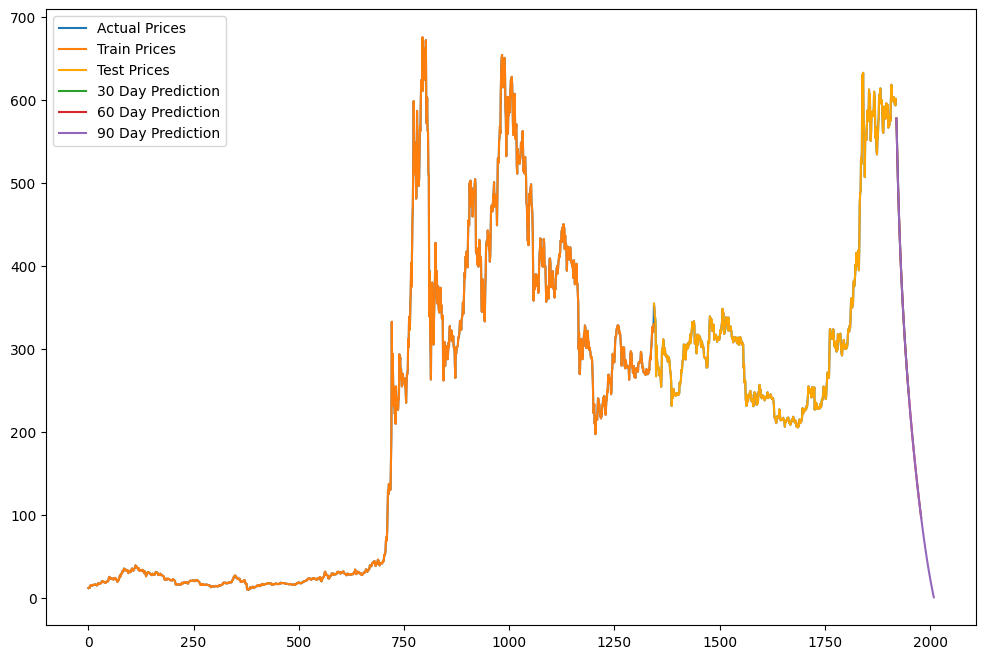

In [7]:
# Predict future values
def predict_future(model, data, days, look_back):
    predictions = []
    current_step = data[-look_back:]
    for _ in range(days):
        prediction = model.predict(current_step.reshape(1, look_back, 1))
        predictions.append(prediction[0, 0])
        current_step = np.append(current_step[1:], prediction[0, 0])
    return scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Predict 30, 60, and 90 days
pred_30 = predict_future(model, scaled_prices, 30, look_back)
pred_60 = predict_future(model, scaled_prices, 60, look_back)
pred_90 = predict_future(model, scaled_prices, 90, look_back)

# Print daily predictions
print("30-day predictions:", pred_30.flatten())
print("60-day predictions:", pred_60.flatten())
print("90-day predictions:", pred_90.flatten())

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(scaler.inverse_transform(scaled_prices), label='Actual Prices')
plt.plot(range(len(train)), scaler.inverse_transform(train), label='Train Prices')
plt.plot(range(len(train), len(train) + len(test)), scaler.inverse_transform(test), label='Test Prices', color='orange')
plt.plot(np.arange(len(scaled_prices), len(scaled_prices) + 30), pred_30, label='30 Day Prediction')
plt.plot(np.arange(len(scaled_prices), len(scaled_prices) + 60), pred_60, label='60 Day Prediction')
plt.plot(np.arange(len(scaled_prices), len(scaled_prices) + 90), pred_90, label='90 Day Prediction')
plt.legend()
plt.show()

#6:4

In [8]:
# Chỉ lấy cột giá đóng cửa
prices = data['Close'].values.reshape(-1, 1)

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Phân chia dữ liệu theo tỉ lệ 6:2:2
train_size = int(len(scaled_prices) * 0.6)
test_size = int(len(scaled_prices) * 0.4)

train, test = scaled_prices[0:train_size], scaled_prices[train_size:train_size+test_size]

# Hàm tạo các tập dữ liệu theo định dạng thích hợp cho mô hình RNN
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 60
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Định dạng lại dữ liệu đầu vào cho mô hình RNN [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Xây dựng mô hình RNN
model = Sequential()
model.add(SimpleRNN(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
1091/1091 - 10s - loss: 0.0028 - 10s/epoch - 9ms/step
Epoch 2/50
1091/1091 - 7s - loss: 0.0011 - 7s/epoch - 7ms/step
Epoch 3/50
1091/1091 - 9s - loss: 8.6031e-04 - 9s/epoch - 8ms/step
Epoch 4/50
1091/1091 - 8s - loss: 7.9743e-04 - 8s/epoch - 7ms/step
Epoch 5/50
1091/1091 - 8s - loss: 8.3588e-04 - 8s/epoch - 7ms/step
Epoch 6/50
1091/1091 - 9s - loss: 7.6155e-04 - 9s/epoch - 8ms/step
Epoch 7/50
1091/1091 - 8s - loss: 7.4733e-04 - 8s/epoch - 7ms/step
Epoch 8/50
1091/1091 - 9s - loss: 7.4078e-04 - 9s/epoch - 8ms/step
Epoch 9/50
1091/1091 - 8s - loss: 6.9744e-04 - 8s/epoch - 8ms/step
Epoch 10/50
1091/1091 - 8s - loss: 7.6423e-04 - 8s/epoch - 7ms/step
Epoch 11/50
1091/1091 - 9s - loss: 6.7462e-04 - 9s/epoch - 8ms/step
Epoch 12/50
1091/1091 - 8s - loss: 6.9182e-04 - 8s/epoch - 7ms/step
Epoch 13/50
1091/1091 - 9s - loss: 6.7936e-04 - 9s/epoch - 8ms/step
Epoch 14/50
1091/1091 - 9s - loss: 9.5472e-04 - 9s/epoch - 8ms/step
Epoch 15/50
1091/1091 - 8s - loss: 7.1720e-04 - 8s/epoch - 7ms/

In [9]:
# Đánh giá mô hình
test_predict = model.predict(X_test)
test_predict = scaler.inverse_transform(test_predict)
y_test_actual = scaler.inverse_transform([y_test])

mse = mean_squared_error(y_test_actual[0], test_predict[:,0])
mae = mean_absolute_error(y_test_actual[0], test_predict[:,0])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test_actual[0] - test_predict[:,0]) / y_test_actual[0])) * 100

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

23/23 [==============================] - 0s 5ms/step
MAE: 8.706797403045991
RMSE: 12.660021561887294
MAPE: 2.7018819495745547


1/1 [==============================] - 0s 23ms/step
30-day predictions: [585.17145 570.83997 558.03595 549.79346 534.49567 529.9384  518.7339
 513.2054  506.5388  500.5072  495.4671  490.5992  486.25742 482.42392
 478.79428 475.42233 472.51828 469.5788  467.1504  464.69812 462.5397
 460.5235  458.63968 456.90952 455.3045  453.79678 452.4222  451.12094
 449.92056 448.8026 ]
60-day predictions: [585.17145 570.83997 558.03595 549.79346 534.49567 529.9384  518.7339
 513.2054  506.5388  500.5072  495.4671  490.5992  486.25742 482.42392
 478.79428 475.42233 472.51828 469.5788  467.1504  464.69812 462.5397
 460.5235  458.63968 456.90952 455.3045  453.79678 452.4222  451.12094
 449.92056 448.8026  447.75482 446.78748 445.87677 445.03174 444.24142
 443.50226 442.8142  442.16925 441.56564 441.00388 440.47522 439.98288
 439.51926 439.08945 438.68073 438.30524 437.9469  437.61554 437.30524
 437.01288 436.74008 436.48312 436.2439  436.0182  435.80753 435.6099
 435.42398 435.25003 435.08725 434.9338

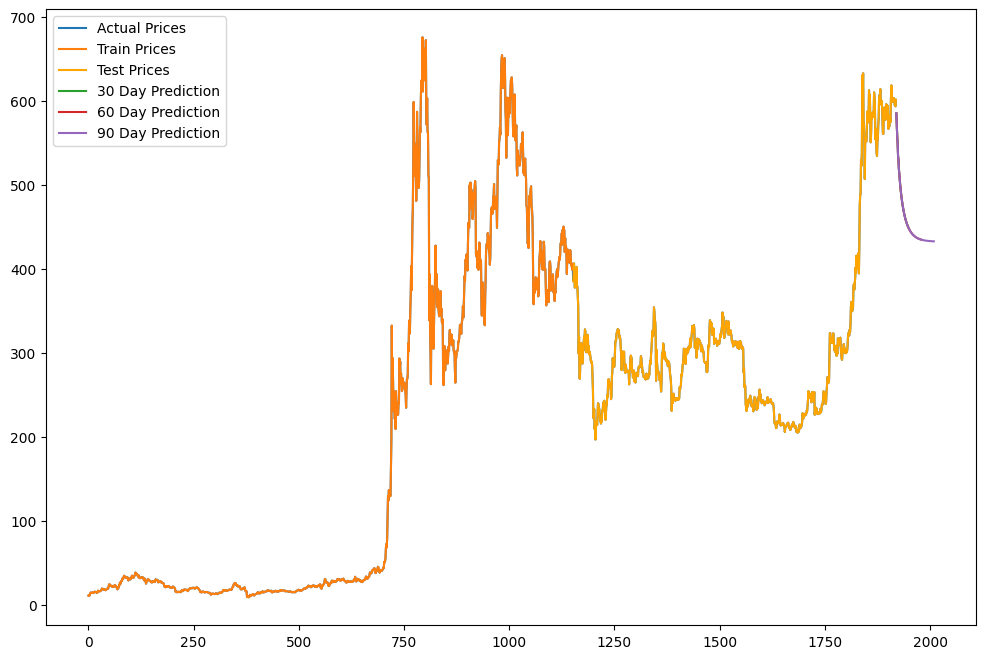

In [10]:
# Predict future values
def predict_future(model, data, days, look_back):
    predictions = []
    current_step = data[-look_back:]
    for _ in range(days):
        prediction = model.predict(current_step.reshape(1, look_back, 1))
        predictions.append(prediction[0, 0])
        current_step = np.append(current_step[1:], prediction[0, 0])
    return scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Predict 30, 60, and 90 days
pred_30 = predict_future(model, scaled_prices, 30, look_back)
pred_60 = predict_future(model, scaled_prices, 60, look_back)
pred_90 = predict_future(model, scaled_prices, 90, look_back)

# Print daily predictions
print("30-day predictions:", pred_30.flatten())
print("60-day predictions:", pred_60.flatten())
print("90-day predictions:", pred_90.flatten())

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(scaler.inverse_transform(scaled_prices), label='Actual Prices')
plt.plot(range(len(train)), scaler.inverse_transform(train), label='Train Prices')
plt.plot(range(len(train), len(train) + len(test)), scaler.inverse_transform(test), label='Test Prices', color='orange')
plt.plot(np.arange(len(scaled_prices), len(scaled_prices) + 30), pred_30, label='30 Day Prediction')
plt.plot(np.arange(len(scaled_prices), len(scaled_prices) + 60), pred_60, label='60 Day Prediction')
plt.plot(np.arange(len(scaled_prices), len(scaled_prices) + 90), pred_90, label='90 Day Prediction')
plt.legend()
plt.show()